In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

# Configuración de matplotlib para mejores gráficas
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Cargar datos de un archivo

In [4]:
def cargar_señal(archivo):
    """
    Carga un archivo CSV de señal
    Retorna un DataFrame con los datos
    """
    # Leer el CSV, saltando las primeras 2 filas (Frequency y Unit)
    df = pd.read_csv(archivo, skiprows=2, header=None, names=['Voltaje_mV'])
    # Crear índice de tiempo (asumiendo muestras consecutivas)
    df['Muestra'] = range(len(df))
    return df

# Probar con el primer archivo
señal_1 = cargar_señal('Señal/001.csv')
print(f"Número de muestras: {len(señal_1)}")
print(f"\nPrimeras filas:")
señal_1.head(10)

Número de muestras: 20004

Primeras filas:


,Voltaje_mV,Muestra
0,CH1,0
1,-8.43,1
2,-8.64,2
3,-5.82,3
4,-1.02,4
5,4.60,5
6,10.03,6
7,14.52,7
8,17.71,8
9,19.56,9


## 2. Visualizar una señal individual

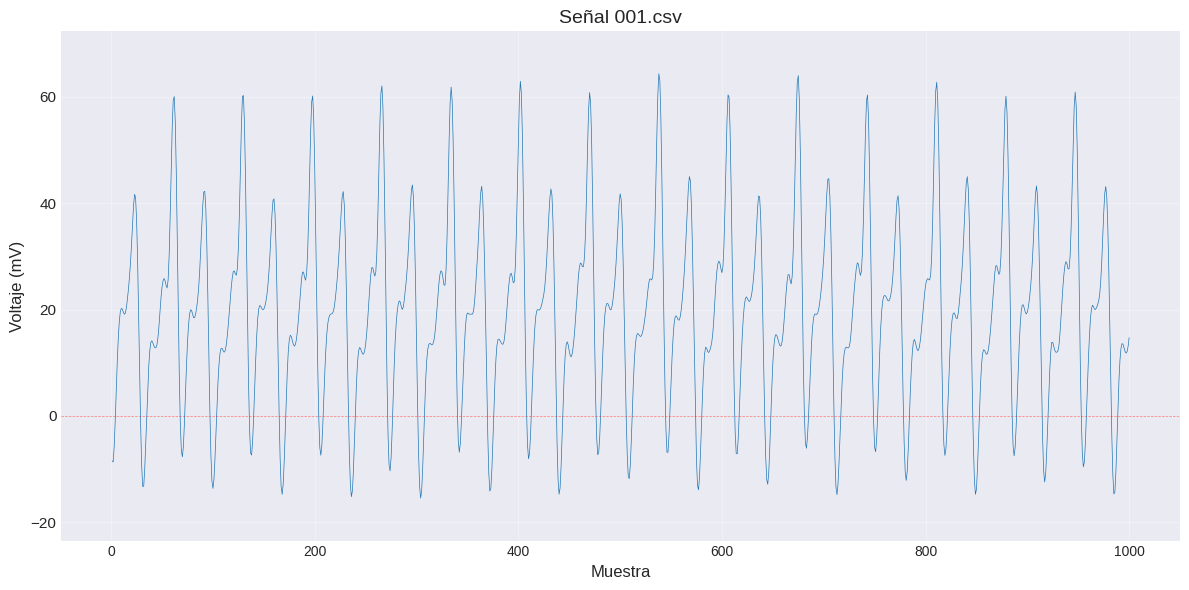

In [5]:
def graficar_señal(df, titulo='Señal', max_muestra=None):
    """
    Grafica una señal
    """
    # Filtrar datos si se especifica un máximo de muestras
    if max_muestra is not None:
        df_plot = df[df['Muestra'] <= max_muestra]
    else:
        df_plot = df
    
    # Convertir a numérico para evitar problemas
    df_plot = df_plot.copy()
    df_plot['Voltaje_mV'] = pd.to_numeric(df_plot['Voltaje_mV'], errors='coerce')
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot['Muestra'], df_plot['Voltaje_mV'], linewidth=0.5)
    plt.xlabel('Muestra', fontsize=12)
    plt.ylabel('Voltaje (mV)', fontsize=12)
    plt.title(titulo, fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Añadir línea en y=0 para referencia
    plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5, alpha=0.5)
    
    # Mejorar la visibilidad del eje y
    plt.ticklabel_format(style='plain', axis='y')
    plt.yticks(fontsize=11)
    
    # Ajustar márgenes para ver mejor los valores
    plt.margins(y=0.1)
    
    plt.tight_layout()
    plt.show()

# Graficar la primera señal hasta la muestra 1000
graficar_señal(señal_1, 'Señal 001.csv', max_muestra=1000)

## 3. Visualizar múltiples señales

In [6]:
# Obtener lista de todos los archivos CSV en la carpeta Señal
carpeta_señal = Path('Señal')
archivos_csv = sorted(carpeta_señal.glob('*.csv'))
print(f"Total de archivos encontrados: {len(archivos_csv)}")
print(f"Primeros 10 archivos: {[f.name for f in archivos_csv[:10]]}")

Total de archivos encontrados: 59
Primeros 10 archivos: ['001.csv', '002.csv', '003.csv', '004.csv', '005.csv', '006.csv', '007.csv', '008.csv', '009.csv', '010.csv']


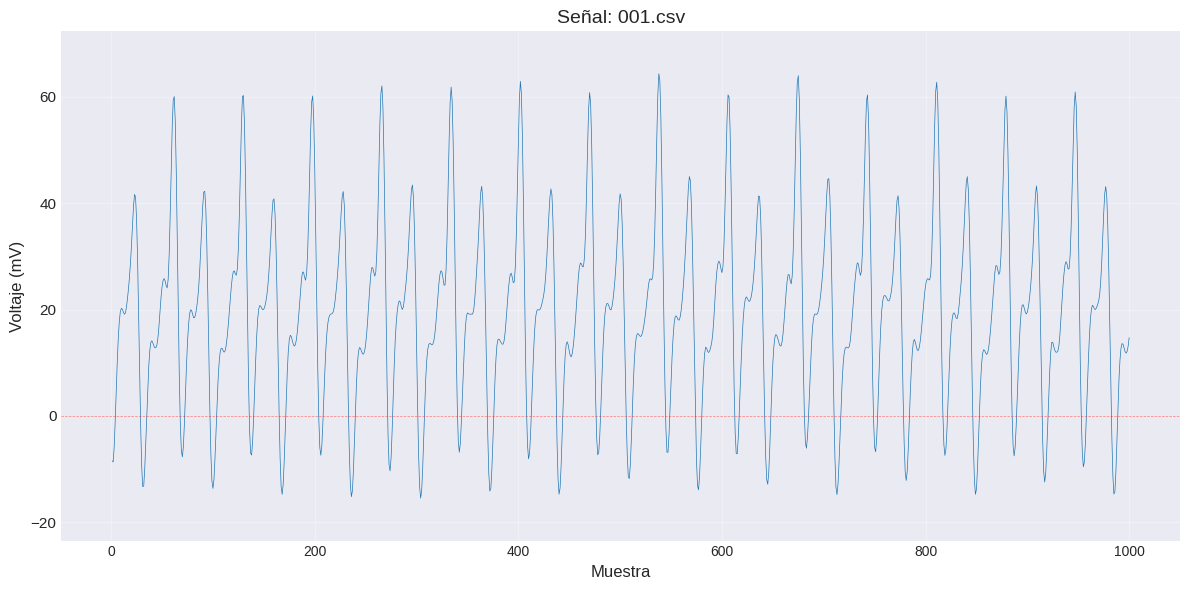

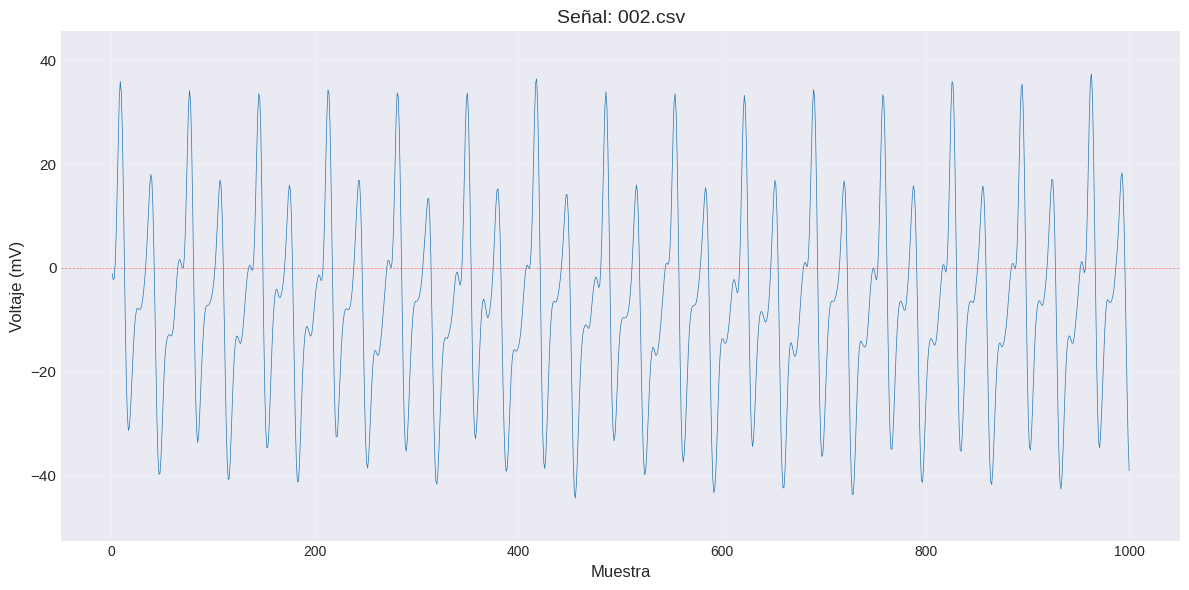

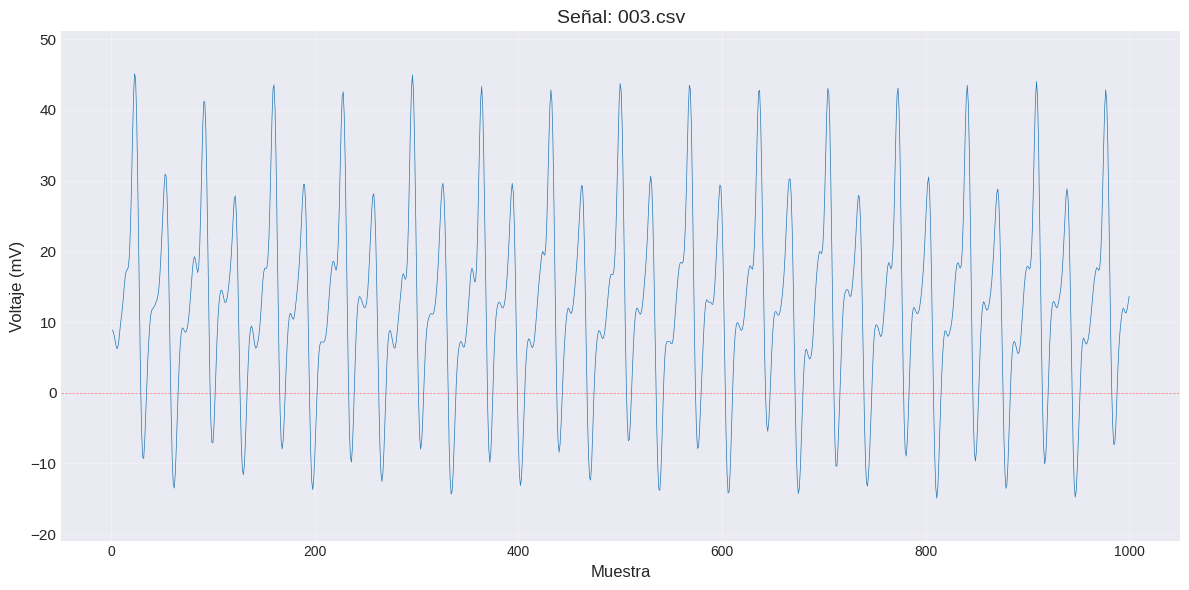

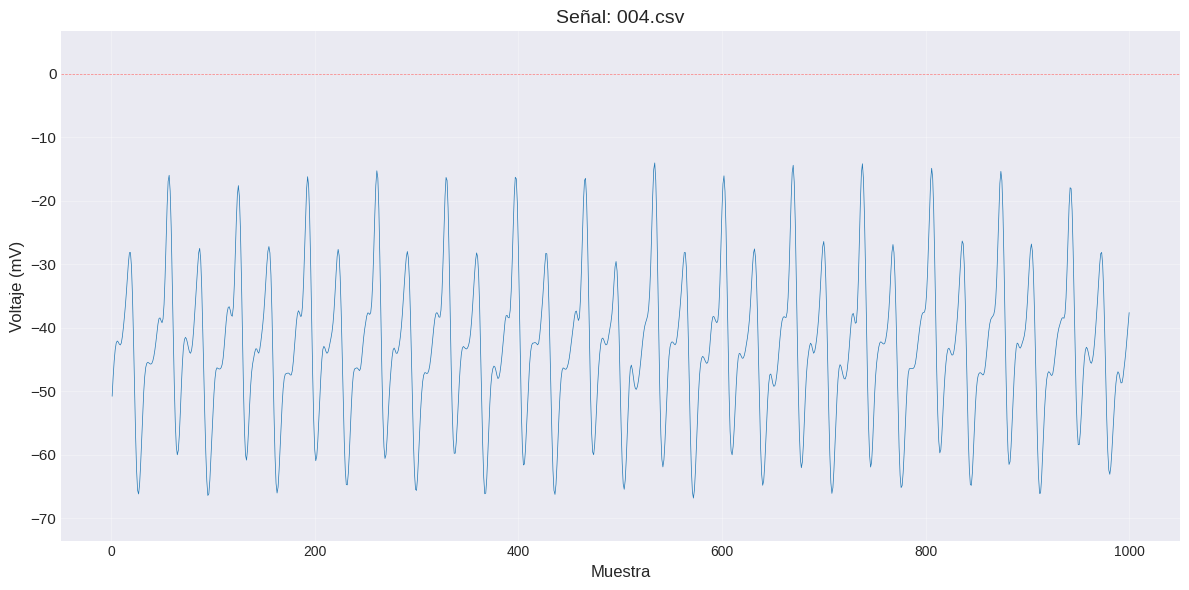

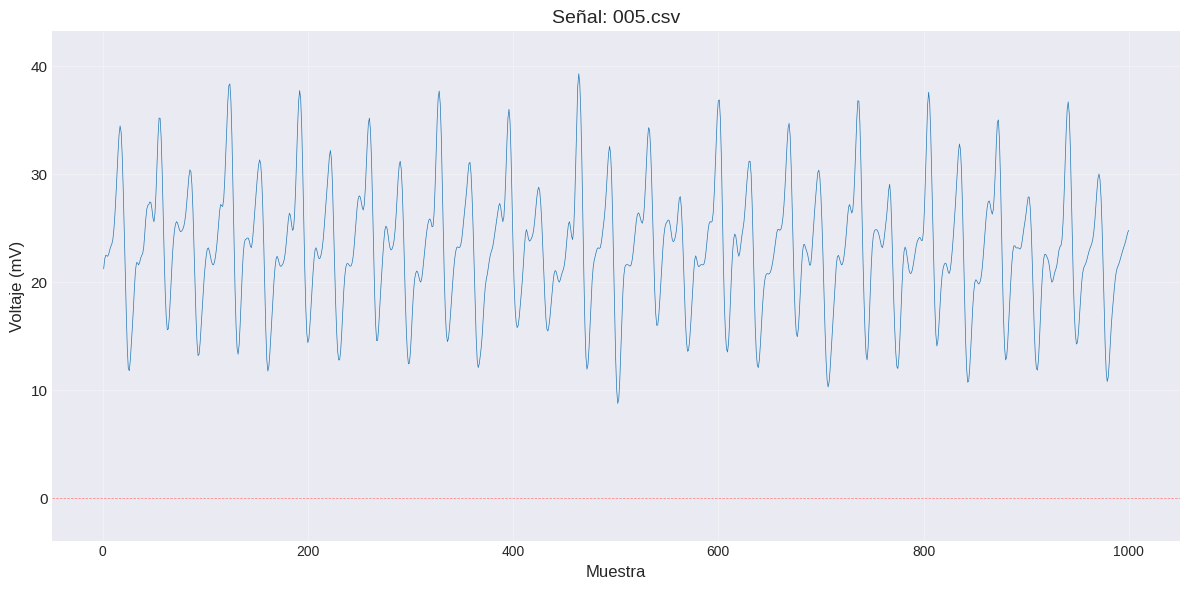

In [7]:
def graficar_multiples_señales(archivos, num_señales=5, inicio=0):
    """
    Grafica múltiples señales una a una usando la función graficar_señal
    
    Args:
        archivos: lista de archivos a graficar
        num_señales: número de señales a graficar
        inicio: índice de inicio para seleccionar archivos
    """
    archivos_seleccionados = archivos[inicio:inicio + num_señales]
    
    for archivo in archivos_seleccionados:
        df = cargar_señal(archivo)
        graficar_señal(df, f'Señal: {archivo.name}', max_muestra=1000)

# Graficar las primeras 5 señales (solo primeras 1000 muestras)
graficar_multiples_señales(archivos_csv, num_señales=5, inicio=0)


## 4. Guardar señales

In [8]:
def guardar_todas_las_señales(archivos, carpeta_destino='Graficas_Señales'):
    """
    Guarda gráficas de todas las señales en una carpeta
    
    Args:
        archivos: lista de archivos a graficar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Generando {len(archivos)} gráficas...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar señal
        df = cargar_señal(archivo)
        
        # Convertir a numérico para evitar problemas
        df['Voltaje_mV'] = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Muestra'][:1000], df['Voltaje_mV'][:1000], linewidth=0.5)
        plt.xlabel('Muestra', fontsize=12)
        plt.ylabel('Voltaje (mV)', fontsize=12)
        plt.title(f'Señal: {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5, alpha=0.5)
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesadas {i}/{len(archivos)} señales...")
    
    print(f"\n¡Completado! Todas las gráficas guardadas en '{carpeta_destino}/'")

# Guardar todas las señales
guardar_todas_las_señales(archivos_csv)

Generando 59 gráficas...
  Procesadas 10/59 señales...
  Procesadas 20/59 señales...
  Procesadas 30/59 señales...
  Procesadas 40/59 señales...
  Procesadas 50/59 señales...

¡Completado! Todas las gráficas guardadas en 'Graficas_Señales/'


## 5. Estadísticas de las señales

In [10]:
def analizar_señal(archivo):
    """
    Calcula estadísticas básicas de una señal
    """
    df = cargar_señal(archivo)
    # Convertir a numérico, forzando errores a NaN
    voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
    # Eliminar NaN
    voltaje = voltaje.dropna()
    
    stats = {
        'Archivo': archivo.name,
        'Muestras': len(voltaje),
        'Media (mV)': voltaje.mean(),
        'Desv. Std (mV)': voltaje.std(),
        'Mínimo (mV)': voltaje.min(),
        'Máximo (mV)': voltaje.max(),
        'Pico-Pico (mV)': voltaje.max() - voltaje.min()
    }
    return stats

# Analizar las primeras 10 señales
estadisticas = [analizar_señal(archivo) for archivo in archivos_csv[:60]]
df_stats = pd.DataFrame(estadisticas)
df_stats

,Archivo,Muestras,Media (mV),Desv. Std (mV),Mínimo (mV),Máximo (mV),Pico-Pico (mV)
0,001.csv,20000,12.141869,17.442252,-64.00,80.00,144.00
1,002.csv,20000,-4.398177,13.492208,-160.00,160.00,320.00
2,003.csv,20000,6.214968,11.284098,-20.00,160.00,180.00
3,004.csv,20000,-21.504926,23.004984,-69.30,-0.01,69.29
4,005.csv,20000,11.974244,12.764069,0.02,43.03,43.01
5,006.csv,20000,25.234137,25.524993,0.01,66.83,66.82
6,007.csv,20000,13.502068,13.900169,0.02,43.20,43.18
7,008.csv,20000,46.063477,46.097640,0.01,100.20,100.19
8,009.csv,20000,-0.526722,10.170929,-320.00,320.00,640.00
9,010.csv,20000,0.811643,6.518349,-320.00,320.00,640.00


## 6. Normalización de datos

In [14]:
def guardar_señales_normalizadas(archivos, carpeta_destino='Graficas_Señales_Normalizadas'):
    """
    Normaliza las señales y guarda las gráficas en una carpeta
    La normalización escala los valores al rango [0, 1]
    
    Args:
        archivos: lista de archivos a procesar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Generando {len(archivos)} gráficas normalizadas...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar señal
        df = cargar_señal(archivo)
        
        # Convertir a numérico para evitar problemas
        voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
        
        # Normalizar: (x - min) / (max - min)
        voltaje_min = voltaje.min()
        voltaje_max = voltaje.max()
        voltaje_normalizado = (voltaje - voltaje_min) / (voltaje_max - voltaje_min)
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Muestra'][:1000], voltaje_normalizado[:1000], linewidth=0.5)
        plt.xlabel('Muestra', fontsize=12)
        plt.ylabel('Voltaje Normalizado [0-1]', fontsize=12)
        plt.title(f'Señal Normalizada: {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.ylim(-0.05, 1.05)  # Añadir un pequeño margen
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}_normalizada.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesadas {i}/{len(archivos)} señales...")
    
    print(f"\n¡Completado! Todas las gráficas normalizadas guardadas en '{carpeta_destino}/'")

# Guardar todas las señales normalizadas
guardar_señales_normalizadas(archivos_csv)

Generando 59 gráficas normalizadas...
  Procesadas 10/59 señales...
  Procesadas 20/59 señales...
  Procesadas 30/59 señales...
  Procesadas 40/59 señales...
  Procesadas 50/59 señales...

¡Completado! Todas las gráficas normalizadas guardadas en 'Graficas_Señales_Normalizadas/'


In [23]:
def guardar_señales_normalizadas_global(archivos, carpeta_destino='Graficas_Señales_Normalizadas_Global'):
    """
    Normaliza las señales usando una escala global y guarda las gráficas en una carpeta
    La normalización usa el mínimo y máximo global de todas las señales
    
    Args:
        archivos: lista de archivos a procesar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Calculando valores mínimo y máximo globales...")
    
    # Primera pasada: encontrar min y max globales
    voltaje_min_global = float('inf')
    voltaje_max_global = float('-inf')
    
    for archivo in archivos:
        df = cargar_señal(archivo)
        voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
        voltaje_min_global = min(voltaje_min_global, voltaje.min())
        voltaje_max_global = max(voltaje_max_global, voltaje.max())
    
    print(f"Voltaje mínimo global: {voltaje_min_global:.2f} mV")
    print(f"Voltaje máximo global: {voltaje_max_global:.2f} mV")
    print(f"\nGenerando {len(archivos)} gráficas normalizadas...")
    
    # Segunda pasada: normalizar y graficar
    for i, archivo in enumerate(archivos, 1):
        # Cargar señal
        df = cargar_señal(archivo)
        
        # Convertir a numérico
        voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
        
        # Normalizar usando min y max globales
        voltaje_normalizado = (voltaje - voltaje_min_global) / (voltaje_max_global - voltaje_min_global)
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Muestra'][:1000], voltaje_normalizado[:1000], linewidth=0.5)
        plt.xlabel('Muestra', fontsize=12)
        plt.ylabel('Voltaje Normalizado [0-1]', fontsize=12)
        plt.title(f'Señal Normalizada (Escala Global): {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.ylim(-0.05, 1.05)
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}_normalizada_global.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesadas {i}/{len(archivos)} señales...")
    
    print(f"\n¡Completado! Todas las gráficas normalizadas guardadas en '{carpeta_destino}/'")

# Guardar todas las señales con normalización global
guardar_señales_normalizadas_global(archivos_csv)

Calculando valores mínimo y máximo globales...
Voltaje mínimo global: -320.00 mV
Voltaje máximo global: 320.00 mV

Generando 59 gráficas normalizadas...
  Procesadas 10/59 señales...
  Procesadas 20/59 señales...
  Procesadas 30/59 señales...
  Procesadas 40/59 señales...
  Procesadas 50/59 señales...

¡Completado! Todas las gráficas normalizadas guardadas en 'Graficas_Señales_Normalizadas_Global/'


## 7. Periodicidad
### 7.1 FFT

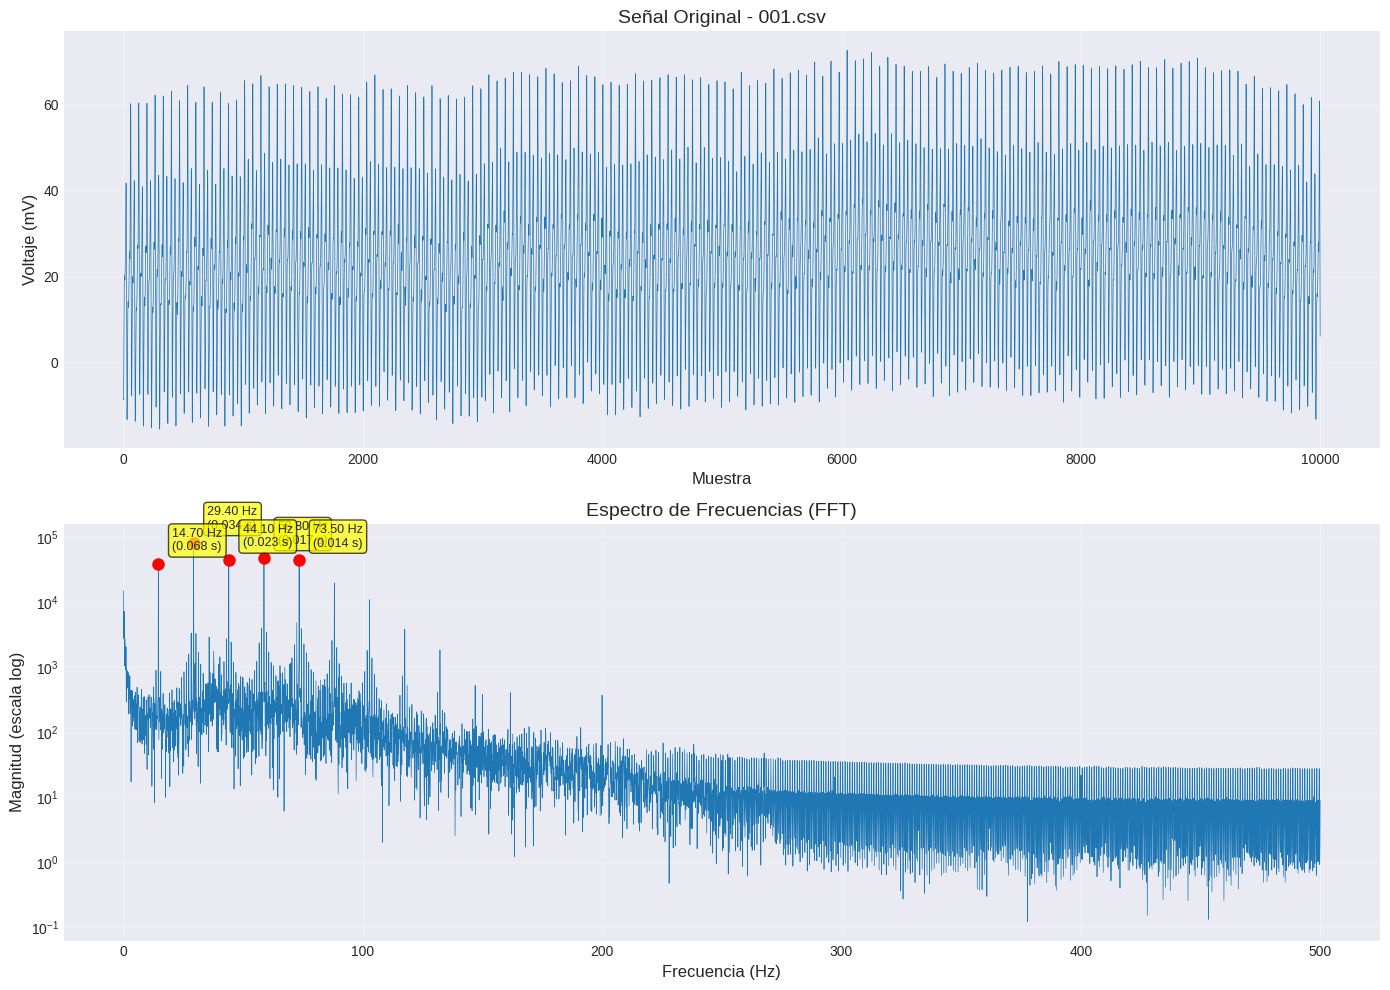


Análisis Espectral - 001.csv

Frecuencias Dominantes:
1. Frecuencia:    29.40 Hz | Período:    0.034 s (    34.0 muestras) | Magnitud:     82229.73
2. Frecuencia:    58.80 Hz | Período:    0.017 s (    17.0 muestras) | Magnitud:     48226.70
3. Frecuencia:    44.10 Hz | Período:    0.023 s (    22.7 muestras) | Magnitud:     44158.01
4. Frecuencia:    73.50 Hz | Período:    0.014 s (    13.6 muestras) | Magnitud:     43990.06
5. Frecuencia:    14.70 Hz | Período:    0.068 s (    68.0 muestras) | Magnitud:     38384.15


In [15]:
def analisis_espectral_fft(archivo, fs=1000, max_muestra=None):
    """
    Realiza análisis espectral usando FFT para detectar periodicidad
    
    Args:
        archivo: ruta del archivo CSV
        fs: frecuencia de muestreo en Hz (asumida)
        max_muestra: número máximo de muestras a analizar
    
    Returns:
        dict con frecuencias dominantes y datos de FFT
    """
    # Cargar señal
    df = cargar_señal(archivo)
    
    # Convertir a numérico y limpiar
    voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce').dropna().values
    
    # Limitar muestras si se especifica
    if max_muestra is not None:
        voltaje = voltaje[:max_muestra]
    
    N = len(voltaje)
    
    # Calcular FFT
    fft_values = np.fft.fft(voltaje)
    fft_freq = np.fft.fftfreq(N, 1/fs)
    
    # Tomar solo frecuencias positivas
    positive_freq_idx = fft_freq > 0
    fft_freq_positive = fft_freq[positive_freq_idx]
    fft_magnitude = np.abs(fft_values[positive_freq_idx])
    
    # Encontrar frecuencias dominantes (top 5)
    top_indices = np.argsort(fft_magnitude)[-5:][::-1]
    frecuencias_dominantes = fft_freq_positive[top_indices]
    magnitudes_dominantes = fft_magnitude[top_indices]
    
    # Calcular períodos correspondientes
    periodos = 1 / frecuencias_dominantes
    
    return {
        'archivo': archivo.name if hasattr(archivo, 'name') else str(archivo),
        'frecuencias_hz': frecuencias_dominantes,
        'magnitudes': magnitudes_dominantes,
        'periodos_muestras': periodos * fs,
        'periodos_segundos': periodos,
        'fft_freq': fft_freq_positive,
        'fft_magnitude': fft_magnitude,
        'señal_original': voltaje
    }

def graficar_espectro(resultado, log_scale=True):
    """
    Grafica el espectro de frecuencias y la señal original
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfica 1: Señal en el tiempo
    ax1.plot(resultado['señal_original'], linewidth=0.5)
    ax1.set_xlabel('Muestra', fontsize=12)
    ax1.set_ylabel('Voltaje (mV)', fontsize=12)
    ax1.set_title(f'Señal Original - {resultado["archivo"]}', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Gráfica 2: Espectro de frecuencias
    ax2.plot(resultado['fft_freq'], resultado['fft_magnitude'], linewidth=0.5)
    
    # Marcar frecuencias dominantes
    for i, (freq, mag) in enumerate(zip(resultado['frecuencias_hz'], resultado['magnitudes'])):
        ax2.plot(freq, mag, 'ro', markersize=8)
        ax2.annotate(f'{freq:.2f} Hz\n({1/freq:.3f} s)', 
                    xy=(freq, mag), 
                    xytext=(10, 10), 
                    textcoords='offset points',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    ax2.set_xlabel('Frecuencia (Hz)', fontsize=12)
    ax2.set_ylabel('Magnitud', fontsize=12)
    ax2.set_title('Espectro de Frecuencias (FFT)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    if log_scale:
        ax2.set_yscale('log')
        ax2.set_ylabel('Magnitud (escala log)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir resultados
    print(f"\n{'='*60}")
    print(f"Análisis Espectral - {resultado['archivo']}")
    print(f"{'='*60}")
    print("\nFrecuencias Dominantes:")
    for i, (freq, mag, per_s, per_m) in enumerate(zip(
        resultado['frecuencias_hz'], 
        resultado['magnitudes'],
        resultado['periodos_segundos'],
        resultado['periodos_muestras']), 1):
        print(f"{i}. Frecuencia: {freq:8.2f} Hz | Período: {per_s:8.3f} s ({per_m:8.1f} muestras) | Magnitud: {mag:12.2f}")

# Analizar primera señal
resultado = analisis_espectral_fft(archivos_csv[0], fs=1000, max_muestra=10000)
graficar_espectro(resultado, log_scale=True)

In [16]:
def extraer_frecuencia_dominante_todas(archivos, fs=1000, max_muestra=10000):
    """
    Extrae la frecuencia dominante de todas las señales
    
    Args:
        archivos: lista de archivos CSV
        fs: frecuencia de muestreo en Hz
        max_muestra: número máximo de muestras a analizar
    
    Returns:
        DataFrame con los resultados
    """
    resultados = []
    
    print(f"Analizando {len(archivos)} señales...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar señal
        df = cargar_señal(archivo)
        
        # Convertir a numérico y limpiar
        voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce').dropna().values
        
        # Limitar muestras
        if max_muestra is not None:
            voltaje = voltaje[:max_muestra]
        
        N = len(voltaje)
        
        # Calcular FFT
        fft_values = np.fft.fft(voltaje)
        fft_freq = np.fft.fftfreq(N, 1/fs)
        
        # Tomar solo frecuencias positivas
        positive_freq_idx = fft_freq > 0
        fft_freq_positive = fft_freq[positive_freq_idx]
        fft_magnitude = np.abs(fft_values[positive_freq_idx])
        
        # Encontrar frecuencia dominante
        idx_max = np.argmax(fft_magnitude)
        freq_dominante = fft_freq_positive[idx_max]
        magnitud_dominante = fft_magnitude[idx_max]
        periodo_segundos = 1 / freq_dominante
        periodo_muestras = periodo_segundos * fs
        
        resultados.append({
            'Archivo': archivo.name,
            'Frecuencia_Dominante_Hz': freq_dominante,
            'Periodo_segundos': periodo_segundos,
            'Periodo_muestras': periodo_muestras,
            'Magnitud_FFT': magnitud_dominante
        })
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesadas {i}/{len(archivos)} señales...")
    
    print(f"\n¡Completado!")
    
    return pd.DataFrame(resultados)

# Extraer frecuencias dominantes de todas las señales
df_frecuencias = extraer_frecuencia_dominante_todas(archivos_csv, fs=1000, max_muestra=10000)
df_frecuencias

Analizando 59 señales...
  Procesadas 10/59 señales...
  Procesadas 20/59 señales...
  Procesadas 30/59 señales...
  Procesadas 40/59 señales...
  Procesadas 50/59 señales...

¡Completado!


,Archivo,Frecuencia_Dominante_Hz,Periodo_segundos,Periodo_muestras,Magnitud_FFT
0,001.csv,29.4,0.034014,34.013605,82229.730250
1,002.csv,29.4,0.034014,34.013605,82814.830189
2,003.csv,29.4,0.034014,34.013605,61131.913829
3,004.csv,29.4,0.034014,34.013605,54099.739019
4,005.csv,29.4,0.034014,34.013605,25667.890392
5,006.csv,29.4,0.034014,34.013605,23447.520521
6,007.csv,29.4,0.034014,34.013605,19458.855620
7,008.csv,0.3,3.333333,3333.333333,11006.848585
8,009.csv,29.4,0.034014,34.013605,55038.183303
9,010.csv,44.1,0.022676,22.675737,26130.084284


### 7.2 Autocorrelación

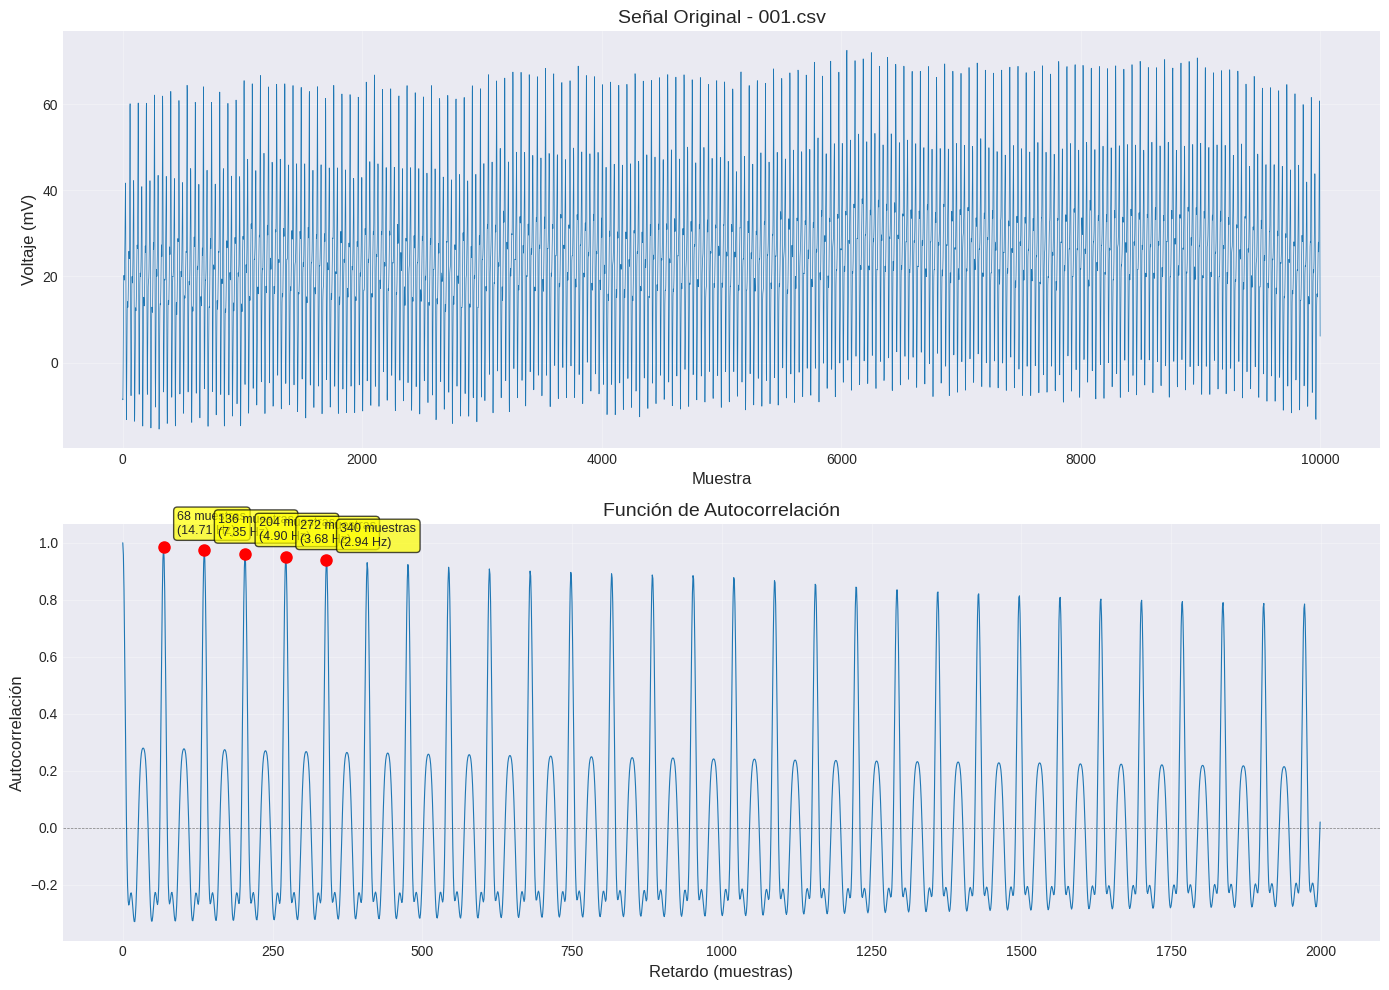


Análisis de Autocorrelación - 001.csv

Períodos detectados (picos de autocorrelación):
1. Período:     68.0 muestras (   0.068 s) | Frecuencia:    14.71 Hz | Autocorr:  0.983
2. Período:    136.0 muestras (   0.136 s) | Frecuencia:     7.35 Hz | Autocorr:  0.973
3. Período:    204.0 muestras (   0.204 s) | Frecuencia:     4.90 Hz | Autocorr:  0.961
4. Período:    272.0 muestras (   0.272 s) | Frecuencia:     3.68 Hz | Autocorr:  0.951
5. Período:    340.0 muestras (   0.340 s) | Frecuencia:     2.94 Hz | Autocorr:  0.941


In [22]:
def analisis_autocorrelacion(archivo, fs=1000, max_muestra=10000, max_lag=2000):
    """
    Realiza análisis de autocorrelación para detectar periodicidad
    
    Args:
        archivo: ruta del archivo CSV
        fs: frecuencia de muestreo en Hz (asumida)
        max_muestra: número máximo de muestras a analizar
        max_lag: máximo retardo a calcular en la autocorrelación
    
    Returns:
        dict con información de periodicidad y datos de autocorrelación
    """
    # Cargar señal
    df = cargar_señal(archivo)
    
    # Convertir a numérico y limpiar
    voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce').dropna().values
    
    # Limitar muestras
    if max_muestra is not None:
        voltaje = voltaje[:max_muestra]
    
    # Normalizar la señal (restar media)
    voltaje_norm = voltaje - np.mean(voltaje)
    
    # Calcular autocorrelación usando numpy
    autocorr = np.correlate(voltaje_norm, voltaje_norm, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Tomar solo la mitad positiva
    
    # Normalizar autocorrelación
    autocorr = autocorr / autocorr[0]
    
    # Limitar a max_lag
    autocorr = autocorr[:max_lag]
    lags = np.arange(len(autocorr))
    
    # Encontrar picos en la autocorrelación (ignorando el pico en lag=0)
    # Buscar máximos locales
    picos = []
    for i in range(1, len(autocorr) - 1):
        if autocorr[i] > autocorr[i-1] and autocorr[i] > autocorr[i+1] and autocorr[i] > 0.1:
            picos.append(i)
    
    # Ordenar picos por magnitud
    if len(picos) > 0:
        picos_ordenados = sorted(picos, key=lambda x: autocorr[x], reverse=True)[:5]
        picos_ordenados = sorted(picos_ordenados)  # Ordenar por lag
        
        periodos_muestras = np.array(picos_ordenados)
        magnitudes = autocorr[picos_ordenados]
        periodos_segundos = periodos_muestras / fs
        frecuencias_hz = 1 / periodos_segundos
    else:
        periodos_muestras = np.array([])
        magnitudes = np.array([])
        periodos_segundos = np.array([])
        frecuencias_hz = np.array([])
    
    return {
        'archivo': archivo.name if hasattr(archivo, 'name') else str(archivo),
        'autocorr': autocorr,
        'lags': lags,
        'periodos_muestras': periodos_muestras,
        'magnitudes': magnitudes,
        'periodos_segundos': periodos_segundos,
        'frecuencias_hz': frecuencias_hz,
        'señal_original': voltaje
    }

def graficar_autocorrelacion(resultado):
    """
    Grafica la señal original y su autocorrelación
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfica 1: Señal en el tiempo
    ax1.plot(resultado['señal_original'], linewidth=0.5)
    ax1.set_xlabel('Muestra', fontsize=12)
    ax1.set_ylabel('Voltaje (mV)', fontsize=12)
    ax1.set_title(f'Señal Original - {resultado["archivo"]}', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Gráfica 2: Autocorrelación
    ax2.plot(resultado['lags'], resultado['autocorr'], linewidth=0.8)
    
    # Marcar picos detectados
    if len(resultado['periodos_muestras']) > 0:
        for i, (lag, mag) in enumerate(zip(resultado['periodos_muestras'], resultado['magnitudes'])):
            ax2.plot(lag, mag, 'ro', markersize=8)
            ax2.annotate(f'{lag:.0f} muestras\n({resultado["frecuencias_hz"][i]:.2f} Hz)', 
                        xy=(lag, mag), 
                        xytext=(10, 10), 
                        textcoords='offset points',
                        fontsize=9,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    ax2.set_xlabel('Retardo (muestras)', fontsize=12)
    ax2.set_ylabel('Autocorrelación', fontsize=12)
    ax2.set_title('Función de Autocorrelación', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='k', linestyle='--', linewidth=0.5, alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir resultados
    print(f"\n{'='*60}")
    print(f"Análisis de Autocorrelación - {resultado['archivo']}")
    print(f"{'='*60}")
    
    if len(resultado['periodos_muestras']) > 0:
        print("\nPeríodos detectados (picos de autocorrelación):")
        for i, (per_m, per_s, freq, mag) in enumerate(zip(
            resultado['periodos_muestras'], 
            resultado['periodos_segundos'],
            resultado['frecuencias_hz'],
            resultado['magnitudes']), 1):
            print(f"{i}. Período: {per_m:8.1f} muestras ({per_s:8.3f} s) | Frecuencia: {freq:8.2f} Hz | Autocorr: {mag:6.3f}")
    else:
        print("\nNo se detectaron períodos claros en la autocorrelación")

# Analizar primera señal con autocorrelación
resultado_autocorr = analisis_autocorrelacion(archivos_csv[0], fs=1000, max_muestra=10000, max_lag=2000)
graficar_autocorrelacion(resultado_autocorr)

In [19]:
def extraer_frecuencia_dominante_autocorr_todas(archivos, fs=1000, max_muestra=10000, max_lag=2000):
    """
    Extrae la frecuencia dominante usando autocorrelación de todas las señales
    
    Args:
        archivos: lista de archivos CSV
        fs: frecuencia de muestreo en Hz
        max_muestra: número máximo de muestras a analizar
        max_lag: máximo retardo a calcular en la autocorrelación
    
    Returns:
        DataFrame con los resultados
    """
    resultados = []
    
    print(f"Analizando {len(archivos)} señales con autocorrelación...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar señal
        df = cargar_señal(archivo)
        
        # Convertir a numérico y limpiar
        voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce').dropna().values
        
        # Limitar muestras
        if max_muestra is not None:
            voltaje = voltaje[:max_muestra]
        
        # Normalizar la señal (restar media)
        voltaje_norm = voltaje - np.mean(voltaje)
        
        # Calcular autocorrelación
        autocorr = np.correlate(voltaje_norm, voltaje_norm, mode='full')
        autocorr = autocorr[len(autocorr)//2:]  # Tomar solo la mitad positiva
        
        # Normalizar autocorrelación
        autocorr = autocorr / autocorr[0]
        
        # Limitar a max_lag
        autocorr = autocorr[:max_lag]
        
        # Encontrar picos en la autocorrelación (ignorando el pico en lag=0)
        picos = []
        for j in range(1, len(autocorr) - 1):
            if autocorr[j] > autocorr[j-1] and autocorr[j] > autocorr[j+1] and autocorr[j] > 0.1:
                picos.append(j)
        
        # Obtener el pico más fuerte (primer período dominante)
        if len(picos) > 0:
            picos_ordenados = sorted(picos, key=lambda x: autocorr[x], reverse=True)
            periodo_dominante_muestras = picos_ordenados[0]
            magnitud_autocorr = autocorr[periodo_dominante_muestras]
            periodo_segundos = periodo_dominante_muestras / fs
            frecuencia_hz = 1 / periodo_segundos
        else:
            # No se detectó período claro
            periodo_dominante_muestras = np.nan
            magnitud_autocorr = np.nan
            periodo_segundos = np.nan
            frecuencia_hz = np.nan
        
        resultados.append({
            'Archivo': archivo.name,
            'Frecuencia_Dominante_Hz': frecuencia_hz,
            'Periodo_segundos': periodo_segundos,
            'Periodo_muestras': periodo_dominante_muestras,
            'Magnitud_Autocorr': magnitud_autocorr
        })
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesadas {i}/{len(archivos)} señales...")
    
    print(f"\n¡Completado!")
    
    return pd.DataFrame(resultados)

# Extraer frecuencias dominantes de todas las señales usando autocorrelación
df_frecuencias_autocorr = extraer_frecuencia_dominante_autocorr_todas(archivos_csv, fs=1000, max_muestra=10000, max_lag=2000)
df_frecuencias_autocorr

Analizando 59 señales con autocorrelación...
  Procesadas 10/59 señales...
  Procesadas 20/59 señales...
  Procesadas 30/59 señales...
  Procesadas 40/59 señales...
  Procesadas 50/59 señales...

¡Completado!


,Archivo,Frecuencia_Dominante_Hz,Periodo_segundos,Periodo_muestras,Magnitud_Autocorr
0,001.csv,14.705882,0.068,68,0.983492
1,002.csv,14.705882,0.068,68,0.981648
2,003.csv,14.705882,0.068,68,0.976096
3,004.csv,14.705882,0.068,68,0.976389
4,005.csv,7.352941,0.136,136,0.951633
5,006.csv,7.352941,0.136,136,0.945525
6,007.csv,7.352941,0.136,136,0.935362
7,008.csv,7.352941,0.136,136,0.829610
8,009.csv,14.705882,0.068,68,0.977915
9,010.csv,14.705882,0.068,68,0.959040
